# Commodity Signal Scanner - CSV Test Version

This notebook tests the commodity signal scanner using CSV data instead of Bloomberg BQL.

**Purpose:** Debug and calibrate the signal scanner before deploying to BQuant.

**Data Sources:**
- `combined_prices.csv` - Close prices for all assets
- `OHLV_*.csv` - OHLCV data for individual commodities

---
## 1. Setup and Imports

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 200)

# Import CSV data loader
from csv_data_loader import (
    load_combined_prices,
    load_ohlv_data,
    fetch_historical_data,
    fetch_price_data,
    fetch_multi_asset_data,
    get_available_tickers,
    validate_data,
    COMMODITY_UNIVERSE,
    CURRENCY_UNIVERSE,
    BOND_UNIVERSE,
    EQUITY_UNIVERSE,
)

print("Imports successful!")
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M')}")

Imports successful!
Analysis Date: 2026-01-28 00:32


---
## 2. Data Validation

Check that CSV data loads correctly and identify any issues.

In [2]:
# Run data validation
print("Running data validation...")
print("=" * 60)

validation = validate_data()

print("\nCOMBINED PRICES SUMMARY:")
print(f"  Total rows: {validation['combined_prices'].get('total_rows', 'N/A')}")
print(f"  Date range: {validation['combined_prices'].get('date_range', 'N/A')}")

print("\nOHLV FILES SUMMARY:")
for ticker, info in validation['ohlv_files'].items():
    print(f"  {ticker}: {info['rows']} rows, {info['date_range']}")

print("\nISSUES FOUND:")
if validation['issues']:
    for issue in validation['issues']:
        print(f"  Warning: {issue}")
else:
    print("  No critical issues")

print("\nAVAILABLE TICKERS:")
available = get_available_tickers()
print(f"  OHLV data: {available['ohlv']}")
print(f"  Close data: {available['close']}")

Running data validation...

COMBINED PRICES SUMMARY:
  Total rows: 505
  Date range: 2024-09-09 00:00:00 to 2026-01-26 00:00:00

OHLV FILES SUMMARY:
  GCA Comdty: 487 rows, 2024-09-27 00:00:00 to 2026-01-26 00:00:00
  SIA Comdty: 487 rows, 2024-09-27 00:00:00 to 2026-01-26 00:00:00
  PLA Comdty: 487 rows, 2024-09-27 00:00:00 to 2026-01-26 00:00:00
  PAA Comdty: 487 rows, 2024-09-27 00:00:00 to 2026-01-26 00:00:00
  CLA Comdty: 487 rows, 2024-09-27 00:00:00 to 2026-01-26 00:00:00

ISSUES FOUND:

AVAILABLE TICKERS:
  OHLV data: ['GCA Comdty', 'SIA Comdty', 'PLA Comdty', 'PAA Comdty', 'CLA Comdty', 'NGA Comdty', 'HOA Comdty', 'XBA Comdty', 'HGA Comdty', 'LMAHDS03 Comdty', 'LMNIDS03 Comdty', 'C A Comdty', 'S A Comdty', 'W A Comdty', 'SB A Comdty']
  Close data: ['GCA Comdty', 'SIA Comdty', 'PLA Comdty', 'PAA Comdty', 'CLA Comdty', 'DXY Index', 'USDJPY Curncy', 'EURUSD Curncy', 'GBPUSD Curncy', 'AUDUSD Curncy', 'USDCAD Curncy', 'TUA Comdty', 'FVA Comdty', 'TYA Comdty', 'USA Comdty', 'ESA In

---
## 3. Load and Inspect Data

In [3]:
# Load combined prices
print("Loading combined_prices.csv...")
combined = load_combined_prices(filter_valid=True)

print(f"\nShape: {combined.shape}")
print(f"Date range: {combined.index.min()} to {combined.index.max()}")
print(f"\nColumns: {list(combined.columns)}")
print("\nFirst 5 rows:")
display(combined.head())

print("\nLast 5 rows:")
display(combined.tail())

Loading combined_prices.csv...

Shape: (505, 18)
Date range: 2024-09-09 00:00:00 to 2026-01-26 00:00:00

Columns: ['GCA Comdty', 'SIA Comdty', 'PLA Comdty', 'PAA Comdty', 'CLA Comdty', 'DXY Index', 'USDJPY Curncy', 'EURUSD Curncy', 'GBPUSD Curncy', 'AUDUSD Curncy', 'USDCAD Curncy', 'TUA Comdty', 'FVA Comdty', 'TYA Comdty', 'USA Comdty', 'ESA Index', 'NQA Index', 'RTYA Index']

First 5 rows:


,GCA Comdty,SIA Comdty,PLA Comdty,PAA Comdty,CLA Comdty,DXY Index,USDJPY Curncy,EURUSD Curncy,GBPUSD Curncy,AUDUSD Curncy,USDCAD Curncy,TUA Comdty,FVA Comdty,TYA Comdty,USA Comdty,ESA Index,NQA Index,RTYA Index
Date,,,,,,,,,,,,,,,,,,
2024-09-09,2662.7,30.249,1002.1,NaN,NaN,101.552,NaN,1.1035,1.3074,0.6661,1.3559,NaN,NaN,NaN,NaN,5721.50,NaN,NaN
2024-09-10,2672.4,30.186,999.8,NaN,NaN,101.630,NaN,1.1020,1.3080,0.6652,1.3610,NaN,NaN,NaN,NaN,5746.00,NaN,NaN
2024-09-11,2672.1,30.490,1010.7,NaN,NaN,101.684,NaN,1.1012,1.3043,0.6674,1.3575,NaN,NaN,NaN,NaN,5809.00,NaN,NaN
2024-09-12,2711.8,31.743,1033.3,NaN,NaN,101.366,NaN,1.1074,1.3124,0.6722,1.3580,NaN,NaN,NaN,NaN,5860.25,NaN,NaN
2024-09-13,2740.9,32.709,1055.5,NaN,NaN,101.114,NaN,1.1075,1.3124,0.6704,1.3585,NaN,NaN,NaN,NaN,5885.00,NaN,NaN



Last 5 rows:


,GCA Comdty,SIA Comdty,PLA Comdty,PAA Comdty,CLA Comdty,DXY Index,USDJPY Curncy,EURUSD Curncy,GBPUSD Curncy,AUDUSD Curncy,USDCAD Curncy,TUA Comdty,FVA Comdty,TYA Comdty,USA Comdty,ESA Index,NQA Index,RTYA Index
Date,,,,,,,,,,,,,,,,,,
2026-01-22,4949.400000,96.372000,2576.900000,1927.7,59.360000,98.359000,158.41,1.1755,1.3501,0.6840,1.3786,104.085900,108.640600,111.593800,115.1875,6945.00,25658.25,2730.800000
2026-01-23,5017.000000,101.333000,2741.300000,2027.6,61.070000,97.599010,155.70,1.1828,1.3643,0.6894,1.3699,104.105500,108.687500,111.671900,115.3438,6945.75,25738.25,2679.600000
2026-01-24,5017.000000,101.333000,2741.300000,2027.6,61.070000,97.599010,155.70,1.1828,1.3643,0.6894,1.3699,104.105500,108.687500,111.671900,115.3438,6945.75,25738.25,2679.600000
2026-01-25,5017.000000,101.333000,2741.300000,2027.6,61.070000,97.599010,154.68,1.1866,1.3669,0.6924,1.3699,104.105500,108.687500,111.671900,115.3438,6945.75,25738.25,2679.600000
2026-01-26,5121.399902,114.705002,2835.699951,2162.5,60.790001,96.939003,154.10,1.1878,1.3694,0.6930,1.3710,104.121094,108.773438,111.828125,115.6875,6989.00,25914.75,2672.300049


In [4]:
# Load OHLV data for Gold
print("Loading Gold OHLV data...")
gold_ohlv = load_ohlv_data('GCA Comdty')

if gold_ohlv is not None:
    print(f"\nShape: {gold_ohlv.shape}")
    print(f"Date range: {gold_ohlv['Date'].min()} to {gold_ohlv['Date'].max()}")
    print(f"\nColumns: {list(gold_ohlv.columns)}")
    print("\nSample data:")
    display(gold_ohlv.head(10))
else:
    print("Failed to load Gold OHLV data")

Loading Gold OHLV data...

Shape: (487, 6)
Date range: 2024-09-27 00:00:00 to 2026-01-26 00:00:00

Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

Sample data:


,Date,Open,High,Low,Close,Volume
0,2024-09-27,2805.0,2805.0,2805.0,2801.6,1
1,2024-09-28,2805.0,2805.0,2805.0,2801.6,1
2,2024-09-29,2805.0,2805.0,2805.0,2801.6,1
3,2024-09-30,2784.9,2784.9,2784.9,2794.7,3
4,2024-10-01,2822.0,2822.0,2822.0,2827.0,1
5,2024-10-02,2822.0,2822.0,2822.0,2807.9,5
6,2024-10-03,2822.0,2822.0,2822.0,2817.7,5
7,2024-10-04,2799.9,2799.9,2799.9,2813.7,4
8,2024-10-05,2799.9,2799.9,2799.9,2813.7,4
9,2024-10-06,2799.9,2799.9,2799.9,2813.7,4


In [5]:
# Test fetch_historical_data function
print("Testing fetch_historical_data() function...")
print("=" * 60)

for ticker in ['GCA Comdty', 'SIA Comdty', 'CLA Comdty', 'DXY Index']:
    df = fetch_historical_data(ticker, days=90)
    if df is not None:
        print(f"\n{ticker}: {len(df)} rows")
        print(f"  Columns: {list(df.columns)}")
        print(f"  Close range: {df['Close'].min():.2f} - {df['Close'].max():.2f}")
    else:
        print(f"\n{ticker}: FAILED to load")

Testing fetch_historical_data() function...

GCA Comdty: 91 rows
  Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
  Close range: 4022.50 - 5121.40

SIA Comdty: 91 rows
  Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
  Close range: 47.87 - 114.71

CLA Comdty: 91 rows
  Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
  Close range: 55.05 - 61.88

DXY Index: 91 rows
  Columns: ['Date', 'Close', 'Open', 'High', 'Low', 'Volume']
  Close range: 96.94 - 100.23


In [6]:
# Test fetch_price_data function
print("Testing fetch_price_data() function...")
print("=" * 60)

for ticker in ['GCA Comdty', 'DXY Index', 'USDJPY Curncy', 'ESA Index']:
    df = fetch_price_data(ticker, days=252)
    if df is not None:
        print(f"\n{ticker}: {len(df)} rows")
        print(f"  Columns: {list(df.columns)}")
    else:
        print(f"\n{ticker}: FAILED to load")

Testing fetch_price_data() function...

GCA Comdty: 253 rows
  Columns: ['Date', 'Close', 'Ticker']

DXY Index: 253 rows
  Columns: ['Date', 'Close', 'Ticker']

USDJPY Curncy: 253 rows
  Columns: ['Date', 'Close', 'Ticker']

ESA Index: 253 rows
  Columns: ['Date', 'Close', 'Ticker']


In [7]:
# Test fetch_multi_asset_data function
print("Testing fetch_multi_asset_data() function...")
print("=" * 60)

tickers = ['GCA Comdty', 'SIA Comdty', 'DXY Index', 'ESA Index']
returns_df = fetch_multi_asset_data(tickers, days=252)

print(f"\nShape: {returns_df.shape}")
print(f"Columns: {list(returns_df.columns)}")
print("\nSample returns:")
display(returns_df.head())

print("\nCorrelation matrix:")
display(returns_df.corr())

Testing fetch_multi_asset_data() function...

Shape: (252, 4)
Columns: ['GCA Comdty', 'SIA Comdty', 'DXY Index', 'ESA Index']

Sample returns:


,GCA Comdty,SIA Comdty,DXY Index,ESA Index
Date,,,,
2025-05-20,0.014886,0.019817,-0.003067,-0.003622
2025-05-21,0.009281,0.013888,-0.005583,-0.016298
2025-05-22,-0.005366,-0.012576,0.004028,-0.000830
2025-05-23,0.021173,0.011454,-0.008483,-0.006982
2025-05-24,0.000000,0.000000,0.000000,0.000000



Correlation matrix:


,GCA Comdty,SIA Comdty,DXY Index,ESA Index
GCA Comdty,1.000000,0.714653,-0.358240,0.025053
SIA Comdty,0.714653,1.000000,-0.234328,0.110018
DXY Index,-0.358240,-0.234328,1.000000,-0.015892
ESA Index,0.025053,0.110018,-0.015892,1.000000


---
## 4. Data Quality Charts

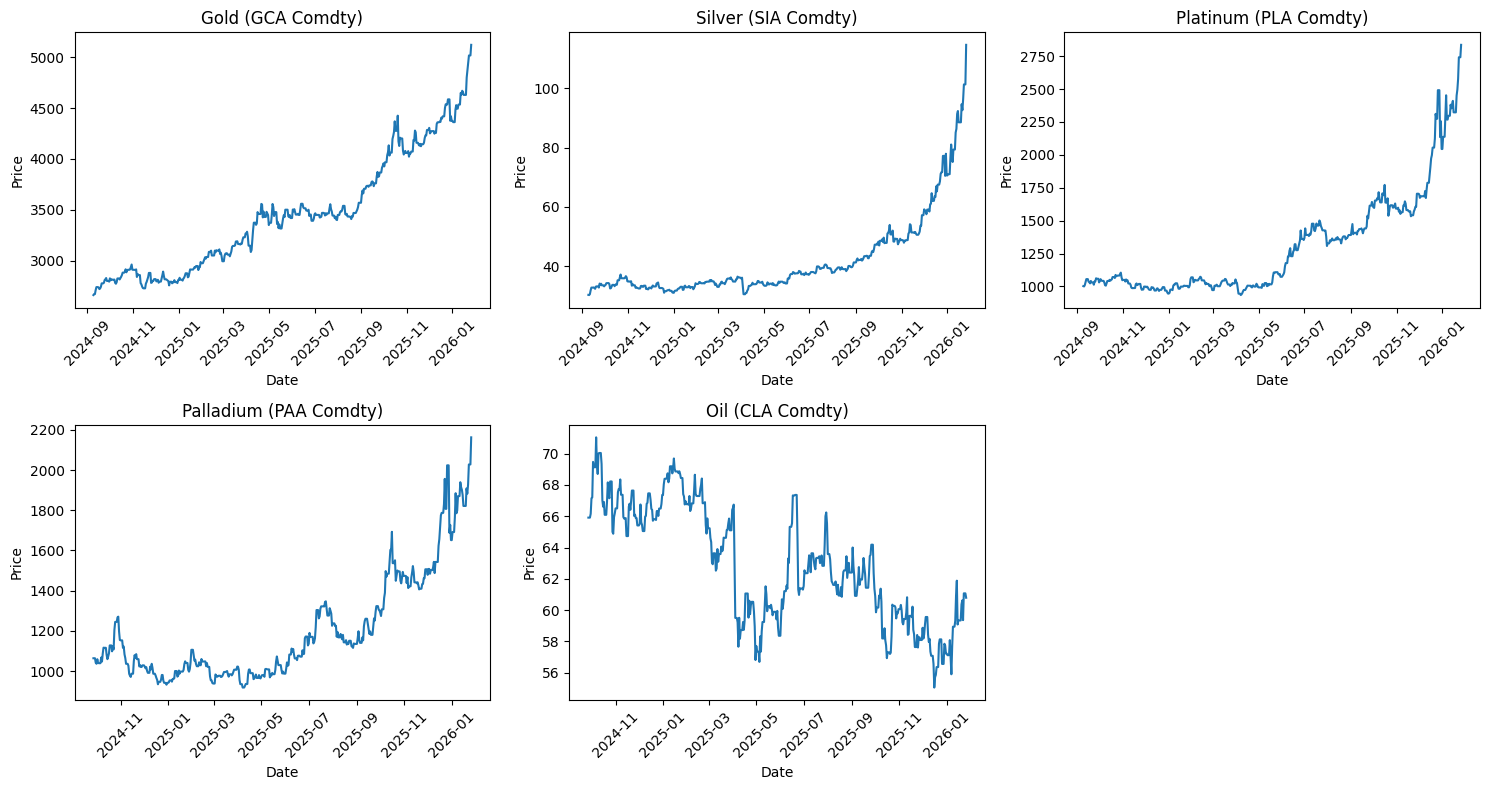

In [8]:
# Plot commodity prices
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

commodities = ['GCA Comdty', 'SIA Comdty', 'PLA Comdty', 'PAA Comdty', 'CLA Comdty']
names = ['Gold', 'Silver', 'Platinum', 'Palladium', 'Oil']

for i, (ticker, name) in enumerate(zip(commodities, names)):
    ax = axes[i // 3, i % 3]
    if ticker in combined.columns:
        data = combined[ticker].dropna()
        ax.plot(data.index, data.values)
        ax.set_title(f'{name} ({ticker})')
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.tick_params(axis='x', rotation=45)
    else:
        ax.text(0.5, 0.5, 'No Data', ha='center', va='center')
        ax.set_title(f'{name} - NO DATA')

# Hide empty subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

Generating correlation heatmap...


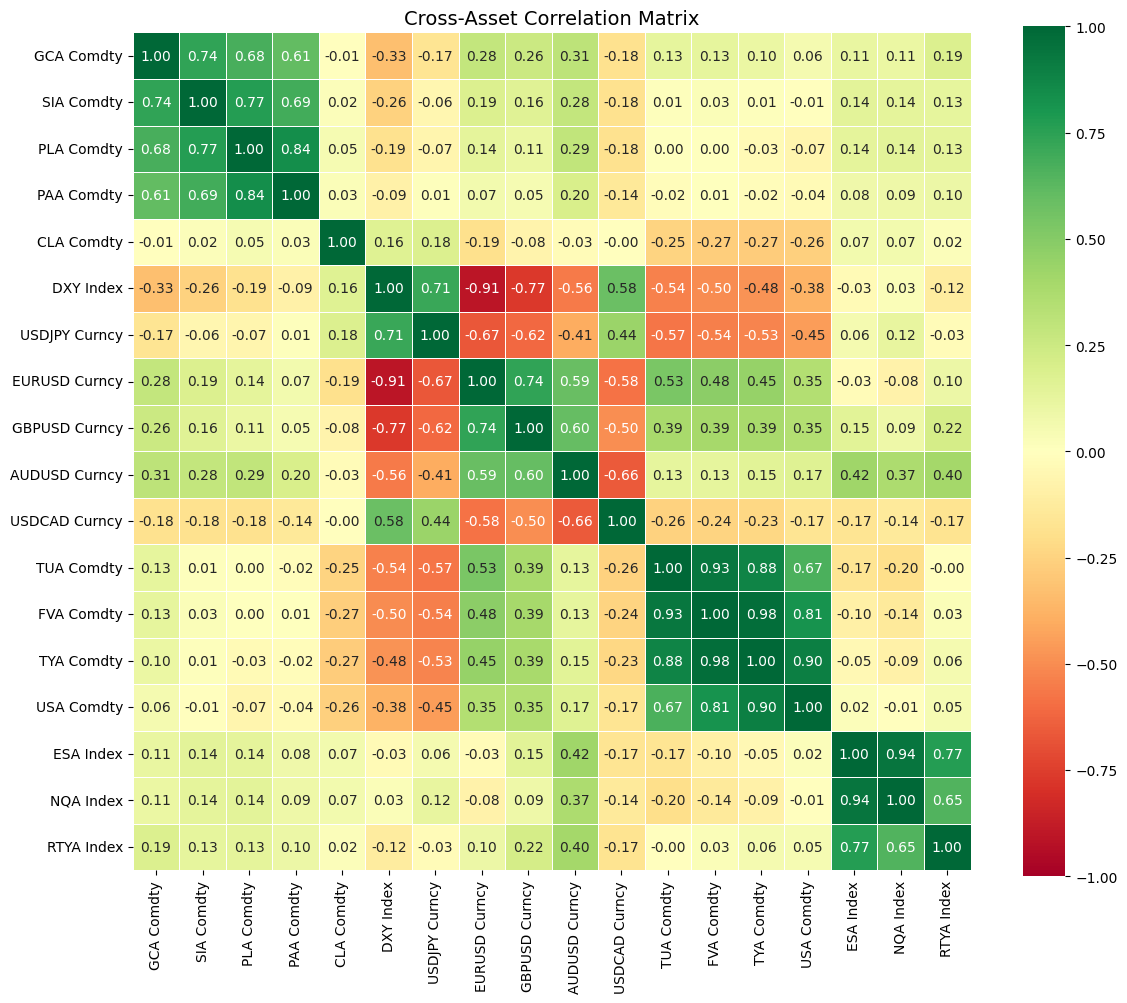

In [9]:
# Correlation heatmap
print("Generating correlation heatmap...")

# Get all available tickers
all_tickers = [t for t in combined.columns if combined[t].notna().sum() > 50]
returns = fetch_multi_asset_data(all_tickers, days=252)

if len(returns.columns) > 0:
    corr_matrix = returns.corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        corr_matrix,
        annot=True,
        fmt='.2f',
        cmap='RdYlGn',
        center=0,
        vmin=-1,
        vmax=1,
        square=True,
        linewidths=0.5
    )
    plt.title('Cross-Asset Correlation Matrix', fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print("Not enough data for correlation matrix")

---
## 5. Technical Indicators (from commodity_signals.py)

Test the technical indicator calculations.

In [10]:
def calculate_technical_indicators(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate technical indicators for signal generation.
    Copied from commodity_signals.py for testing.
    """
    df = df.copy()
    
    # Rate of Change at multiple windows
    df['ROC_1'] = df['Close'].pct_change(1) * 100
    df['ROC_2'] = df['Close'].pct_change(2) * 100
    df['ROC_5'] = df['Close'].pct_change(5) * 100
    df['ROC_10'] = df['Close'].pct_change(10) * 100
    df['ROC_20'] = df['Close'].pct_change(20) * 100
    
    # Moving averages
    df['MA_5'] = df['Close'].rolling(5).mean()
    df['MA_10'] = df['Close'].rolling(10).mean()
    df['MA_20'] = df['Close'].rolling(20).mean()
    df['MA_50'] = df['Close'].rolling(50).mean()
    
    # MA slopes (momentum of moving averages)
    df['MA_5_slope'] = df['MA_5'].pct_change(5) * 100
    df['MA_10_slope'] = df['MA_10'].pct_change(10) * 100
    df['MA_20_slope'] = df['MA_20'].pct_change(20) * 100
    
    # RSI
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    
    # ATR (Average True Range)
    if 'High' in df.columns and 'Low' in df.columns:
        high_low = df['High'] - df['Low']
        high_close = (df['High'] - df['Close'].shift()).abs()
        low_close = (df['Low'] - df['Close'].shift()).abs()
        true_range = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
        df['ATR'] = true_range.rolling(14).mean()
    
    # Volume indicators (if volume available)
    if 'Volume' in df.columns and df['Volume'].notna().sum() > 0:
        df['Vol_MA_5'] = df['Volume'].rolling(5).mean()
        df['Vol_MA_20'] = df['Volume'].rolling(20).mean()
        df['Vol_Ratio'] = df['Volume'] / df['Vol_MA_20']
        df['Vol_Trend'] = df['Vol_MA_5'] / df['Vol_MA_20']
    else:
        df['Vol_Ratio'] = 1.0
        df['Vol_Trend'] = 1.0
    
    return df

# Test on Gold data
print("Calculating technical indicators for Gold...")
gold_data = fetch_historical_data('GCA Comdty', days=120)

if gold_data is not None:
    gold_indicators = calculate_technical_indicators(gold_data)
    print(f"\nShape: {gold_indicators.shape}")
    print(f"\nIndicator columns: {[c for c in gold_indicators.columns if c not in ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]}")
    print("\nLatest values:")
    display(gold_indicators[['Date', 'Close', 'ROC_10', 'MA_20', 'RSI']].tail())
else:
    print("Failed to load Gold data")

Calculating technical indicators for Gold...

Shape: (121, 24)

Indicator columns: ['ROC_1', 'ROC_2', 'ROC_5', 'ROC_10', 'ROC_20', 'MA_5', 'MA_10', 'MA_20', 'MA_50', 'MA_5_slope', 'MA_10_slope', 'MA_20_slope', 'RSI', 'ATR', 'Vol_MA_5', 'Vol_MA_20', 'Vol_Ratio', 'Vol_Trend']

Latest values:


,Date,Close,ROC_10,MA_20,RSI
482,2026-01-22,4949.400000,6.457025,4604.085000,90.075664
483,2026-01-23,5017.000000,8.276681,4636.840000,90.522601
484,2026-01-24,5017.000000,7.428106,4669.595000,90.522601
485,2026-01-25,5017.000000,7.714108,4696.240000,90.522601
486,2026-01-26,5121.399902,10.627725,4725.854995,90.358973


In [11]:
def calculate_td_sequential(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate TD Sequential indicator.
    Copied from commodity_signals.py for testing.
    """
    df = df.copy()
    
    # Compare close to close 4 bars ago
    df['Close_vs_4'] = df['Close'] > df['Close'].shift(4)
    
    # Initialize counts
    df['TD_Setup_Buy'] = 0
    df['TD_Setup_Sell'] = 0
    
    buy_count = 0
    sell_count = 0
    
    for i in range(len(df)):
        if pd.isna(df['Close_vs_4'].iloc[i]):
            continue
            
        if df['Close_vs_4'].iloc[i]:  # Close > Close[4]
            sell_count += 1
            buy_count = 0
        else:  # Close < Close[4]
            buy_count += 1
            sell_count = 0
        
        # Cap at 9
        df.iloc[i, df.columns.get_loc('TD_Setup_Buy')] = min(buy_count, 9)
        df.iloc[i, df.columns.get_loc('TD_Setup_Sell')] = min(sell_count, 9)
        
        # Reset after 9
        if buy_count >= 9:
            buy_count = 0
        if sell_count >= 9:
            sell_count = 0
    
    return df

# Test TD Sequential on Gold
print("Calculating TD Sequential for Gold...")

if gold_data is not None:
    gold_td = calculate_td_sequential(gold_data)
    
    # Find TD 9 signals
    buy_9 = gold_td[gold_td['TD_Setup_Buy'] == 9]
    sell_9 = gold_td[gold_td['TD_Setup_Sell'] == 9]
    
    print(f"\nTD Buy 9 signals: {len(buy_9)}")
    print(f"TD Sell 9 signals: {len(sell_9)}")
    
    print("\nLatest TD Sequential values:")
    display(gold_td[['Date', 'Close', 'TD_Setup_Buy', 'TD_Setup_Sell']].tail(10))
else:
    print("No Gold data available")

Calculating TD Sequential for Gold...

TD Buy 9 signals: 0
TD Sell 9 signals: 4

Latest TD Sequential values:


,Date,Close,TD_Setup_Buy,TD_Setup_Sell
477,2026-01-17,4629.400000,2,0
478,2026-01-18,4629.400000,3,0
479,2026-01-19,4629.400000,4,0
480,2026-01-20,4800.800000,0,1
481,2026-01-21,4873.100000,0,2
482,2026-01-22,4949.400000,0,3
483,2026-01-23,5017.000000,0,4
484,2026-01-24,5017.000000,0,5
485,2026-01-25,5017.000000,0,6
486,2026-01-26,5121.399902,0,7


---
## 6. Signal Generation Test

Test basic signal calculation logic.

In [12]:
def calculate_sentiment_score(df: pd.DataFrame) -> float:
    """
    Calculate sentiment score from technical indicators.
    Simplified version from commodity_signals.py.
    """
    if df is None or len(df) < 50:
        return 0.0
    
    # Get latest values
    latest = df.iloc[-1]
    
    score = 0.0
    
    # ROC contribution (35% weight)
    roc_scores = []
    for col in ['ROC_1', 'ROC_2', 'ROC_5', 'ROC_10', 'ROC_20']:
        if col in df.columns and pd.notna(latest.get(col)):
            roc_scores.append(latest[col])
    if roc_scores:
        roc_avg = np.mean(roc_scores)
        score += np.tanh(roc_avg / 2) * 3.5  # Scale to ~3.5 max
    
    # MA trend contribution (25% weight)
    ma_score = 0
    if 'MA_5' in df.columns and 'MA_20' in df.columns:
        if latest['Close'] > latest['MA_5'] > latest['MA_20']:
            ma_score = 2.5  # Bullish alignment
        elif latest['Close'] < latest['MA_5'] < latest['MA_20']:
            ma_score = -2.5  # Bearish alignment
    score += ma_score
    
    # RSI contribution (10% weight)
    if 'RSI' in df.columns and pd.notna(latest.get('RSI')):
        rsi = latest['RSI']
        if rsi > 70:
            score += -1.0  # Overbought
        elif rsi < 30:
            score += 1.0  # Oversold
        else:
            score += (rsi - 50) / 50  # Neutral scaling
    
    # TD Sequential contribution (15% weight)
    if 'TD_Setup_Buy' in df.columns:
        td_buy = latest.get('TD_Setup_Buy', 0)
        td_sell = latest.get('TD_Setup_Sell', 0)
        if td_buy >= 8:
            score += 1.5  # Near buy signal
        elif td_sell >= 8:
            score += -1.5  # Near sell signal
    
    # Volume contribution (15% weight)
    if 'Vol_Ratio' in df.columns and pd.notna(latest.get('Vol_Ratio')):
        vol_ratio = latest['Vol_Ratio']
        if vol_ratio > 1.5:  # High volume
            # Amplify the signal direction
            score *= 1.2
    
    # Clip to [-10, 10] range
    return np.clip(score, -10, 10)


# Test sentiment calculation for all commodities
print("Calculating sentiment scores for all commodities...")
print("=" * 60)

for ticker, info in COMMODITY_UNIVERSE.items():
    df = fetch_historical_data(ticker, days=120)
    if df is not None and len(df) > 50:
        df = calculate_technical_indicators(df)
        df = calculate_td_sequential(df)
        score = calculate_sentiment_score(df)
        
        # Classify signal
        if score >= 7:
            classification = "Very Bullish"
        elif score >= 4:
            classification = "Bullish"
        elif score <= -7:
            classification = "Very Bearish"
        elif score <= -4:
            classification = "Bearish"
        else:
            classification = "Neutral"
        
        print(f"\n{info['name']} ({ticker}):")
        print(f"  Sentiment Score: {score:.2f}")
        print(f"  Classification: {classification}")
        print(f"  Latest Close: ${df['Close'].iloc[-1]:,.2f}")
    else:
        print(f"\n{info['name']} ({ticker}): INSUFFICIENT DATA")

Calculating sentiment scores for all commodities...

Gold (GCA Comdty):
  Sentiment Score: 5.99
  Classification: Bullish
  Latest Close: $5,121.40

Silver (SIA Comdty):
  Sentiment Score: 5.00
  Classification: Bullish
  Latest Close: $114.71

Platinum (PLA Comdty):
  Sentiment Score: 5.00
  Classification: Bullish
  Latest Close: $2,835.70

Palladium (PAA Comdty):
  Sentiment Score: 5.00
  Classification: Bullish
  Latest Close: $2,162.50

Crude Oil (CLA Comdty):
  Sentiment Score: 3.58
  Classification: Neutral
  Latest Close: $60.79


---
## 7. Cross-Commodity Ratios

In [13]:
def calculate_ratio(ticker1: str, ticker2: str, name: str) -> dict:
    """Calculate ratio between two assets."""
    df1 = fetch_price_data(ticker1, days=252)
    df2 = fetch_price_data(ticker2, days=252)
    
    if df1 is None or df2 is None:
        return None
    
    # Merge on Date
    merged = pd.merge(
        df1[['Date', 'Close']].rename(columns={'Close': 'Asset1'}),
        df2[['Date', 'Close']].rename(columns={'Close': 'Asset2'}),
        on='Date'
    )
    
    merged['Ratio'] = merged['Asset1'] / merged['Asset2']
    
    # Calculate z-score
    mean = merged['Ratio'].mean()
    std = merged['Ratio'].std()
    merged['Zscore'] = (merged['Ratio'] - mean) / std
    
    latest = merged.iloc[-1]
    
    return {
        'name': name,
        'current': latest['Ratio'],
        'zscore': latest['Zscore'],
        'mean': mean,
        'min': merged['Ratio'].min(),
        'max': merged['Ratio'].max(),
        'data': merged
    }

# Calculate key ratios
print("Calculating cross-commodity ratios...")
print("=" * 60)

ratios = [
    ('GCA Comdty', 'SIA Comdty', 'Gold/Silver'),
    ('GCA Comdty', 'CLA Comdty', 'Gold/Oil'),
    ('PLA Comdty', 'PAA Comdty', 'Platinum/Palladium'),
]

ratio_results = []
for t1, t2, name in ratios:
    result = calculate_ratio(t1, t2, name)
    if result:
        ratio_results.append(result)
        print(f"\n{name}:")
        print(f"  Current: {result['current']:.2f}")
        print(f"  Z-Score: {result['zscore']:.2f}")
        print(f"  Mean: {result['mean']:.2f}")
        print(f"  Range: {result['min']:.2f} - {result['max']:.2f}")
        
        if abs(result['zscore']) > 2:
            print(f"  EXTREME: Ratio is {abs(result['zscore']):.1f} std devs from mean")
    else:
        print(f"\n{name}: INSUFFICIENT DATA")

Calculating cross-commodity ratios...

Gold/Silver:
  Current: 44.65
  Z-Score: -2.95
  Mean: 81.93
  Range: 44.65 - 100.89
  EXTREME: Ratio is 3.0 std devs from mean



Gold/Oil:
  Current: 84.25
  Z-Score: 2.13
  Mean: 64.57
  Range: 51.38 - 84.25
  EXTREME: Ratio is 2.1 std devs from mean

Platinum/Palladium:
  Current: 1.31
  Z-Score: 2.15
  Mean: 1.16
  Range: 1.03 - 1.35
  EXTREME: Ratio is 2.1 std devs from mean


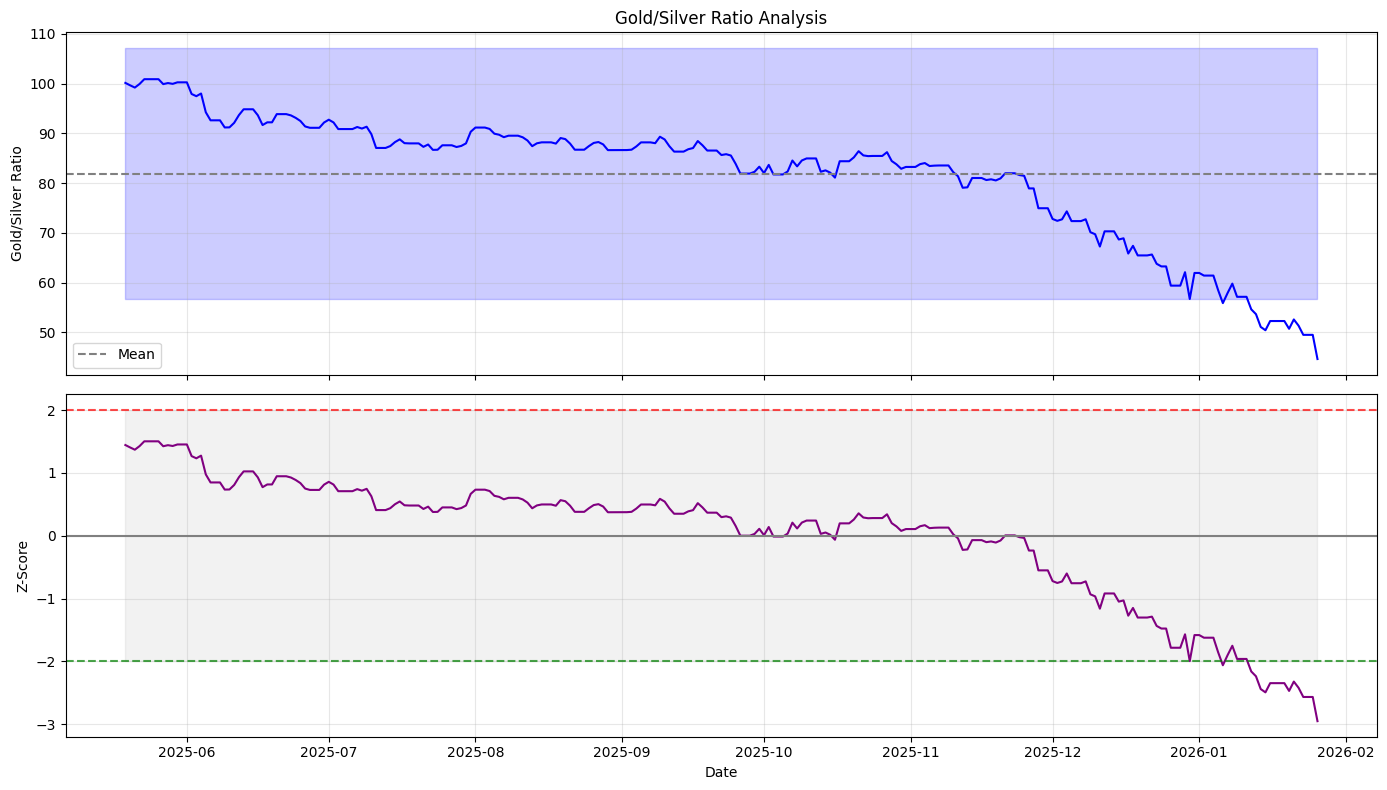

In [14]:
# Plot Gold/Silver ratio
if ratio_results:
    gs_ratio = next((r for r in ratio_results if r['name'] == 'Gold/Silver'), None)
    
    if gs_ratio:
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
        
        data = gs_ratio['data']
        
        # Top: Ratio
        ax1.plot(data['Date'], data['Ratio'], 'b-', linewidth=1.5)
        ax1.axhline(y=gs_ratio['mean'], color='gray', linestyle='--', label='Mean')
        ax1.fill_between(data['Date'], gs_ratio['mean'] - 2*data['Ratio'].std(),
                        gs_ratio['mean'] + 2*data['Ratio'].std(), alpha=0.2, color='blue')
        ax1.set_ylabel('Gold/Silver Ratio')
        ax1.set_title('Gold/Silver Ratio Analysis')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Bottom: Z-Score
        ax2.plot(data['Date'], data['Zscore'], 'purple', linewidth=1.5)
        ax2.axhline(y=0, color='gray', linestyle='-')
        ax2.axhline(y=2, color='red', linestyle='--', alpha=0.7)
        ax2.axhline(y=-2, color='green', linestyle='--', alpha=0.7)
        ax2.fill_between(data['Date'], -2, 2, alpha=0.1, color='gray')
        ax2.set_ylabel('Z-Score')
        ax2.set_xlabel('Date')
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
else:
    print("No ratio data available")

---
## 8. Summary

In [15]:
# Generate summary report
print("=" * 80)
print(f"{'COMMODITY SCANNER - CSV TEST SUMMARY':^80}")
print(f"{'Generated: ' + datetime.now().strftime('%Y-%m-%d %H:%M'):^80}")
print("=" * 80)

print("\nDATA STATUS:")
available = get_available_tickers()
print(f"  OHLV data available for: {len(available['ohlv'])} commodities")
print(f"  Close data available for: {len(available['close'])} assets")

print("\nSIGNAL SUMMARY:")
for ticker, info in COMMODITY_UNIVERSE.items():
    df = fetch_historical_data(ticker, days=120)
    if df is not None and len(df) > 50:
        df = calculate_technical_indicators(df)
        df = calculate_td_sequential(df)
        score = calculate_sentiment_score(df)
        print(f"  {info['name']:<12}: {score:>6.2f}")
    else:
        print(f"  {info['name']:<12}: NO DATA")

print("\nKEY RATIOS:")
for r in ratio_results:
    zscore_str = f"Z: {r['zscore']:+.2f}"
    status = "EXTREME" if abs(r['zscore']) > 2 else "Normal"
    print(f"  {r['name']:<20}: {r['current']:.2f} ({zscore_str}) - {status}")

print("\n" + "=" * 80)

                      COMMODITY SCANNER - CSV TEST SUMMARY                      
                          Generated: 2026-01-28 00:32                           

DATA STATUS:
  OHLV data available for: 15 commodities
  Close data available for: 18 assets

SIGNAL SUMMARY:
  Gold        :   5.99
  Silver      :   5.00
  Platinum    :   5.00
  Palladium   :   5.00
  Crude Oil   :   3.58

KEY RATIOS:
  Gold/Silver         : 44.65 (Z: -2.95) - EXTREME
  Gold/Oil            : 84.25 (Z: +2.13) - EXTREME
  Platinum/Palladium  : 1.31 (Z: +2.15) - EXTREME



---
## Notes

### Issues Found During Testing
- Document any issues here

### Changes Needed for BQuant Version
- Document changes to port back to BQuant